In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('1_Netflix_Data_Exploration_and_Visualisation.csv')

In current analysys we will be focusing on 

1. Categorize based on Movies and TV shows
2. How many movies and TV shows released each year
3. Ratings based categorization
4. How many movies and TV shows come from each country
5. Listed_in, Director and actor based categorization
6. Best Time to release movie and Tv show

##### Assumptions
Since we dont have data on user reviews we can't do popular movie, director, actors based recommendation. 
So we will be considering all movies are front-runners and based on count of actors, directors across different movies recommendations will be made.

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
year_movies = df.groupby('release_year')['show_id'].count().tail(20).reset_index()
print(year_movies.show_id.sum(),'\n', year_movies.show_id.sum()/df.shape[0] * 100)
# here we can see that most of the movies releases in last 20 years

8200 
 93.10775519473147


#### Observation 
93% of the movies added to netflix are released in last 20 years we can see that representation in below graph

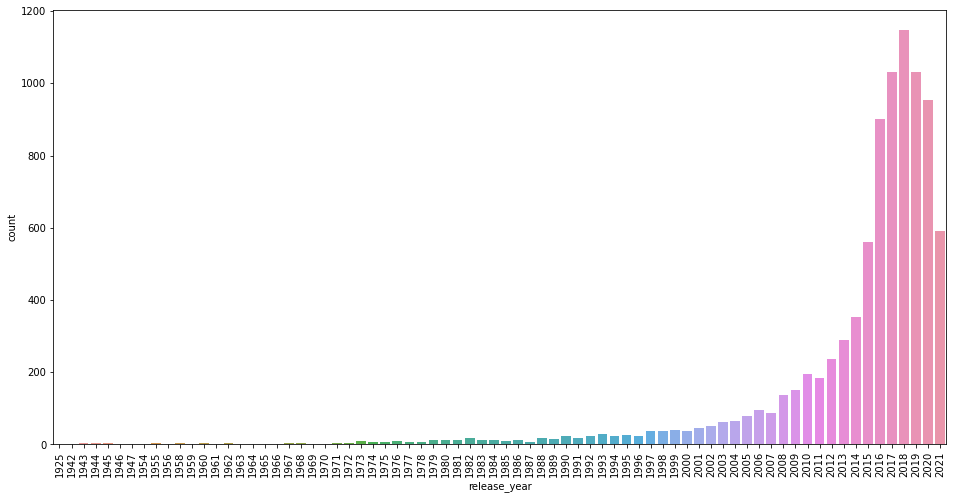

In [8]:
plt.figure(figsize=(16,8))
count = sns.countplot(data=df, x='release_year')
count.set_xticklabels(count.get_xticklabels(), rotation=90)
plt.show()

### 1. Movies vs TV shows

In [9]:
df[(df['type'] != 'Movie') & (df['type'] != 'TV Show')]
# we dont have any other type than Movie and TV shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [10]:
justMoviesdf = df[df['type'] == 'Movie']
justMoviesdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [11]:
justMoviesdf.shape

(6131, 12)

In [12]:
justTvshowdf = df[df['type'] != 'Movie']
justTvshowdf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [13]:
justTvshowdf.shape

(2676, 12)

In [14]:
df.groupby('type')['title'].count() / df.shape[0] * 100

type
Movie      69.615079
TV Show    30.384921
Name: title, dtype: float64

#### Observation 
From above data we can see that 69.6% of content on netflix data are Movies, 30.3% of the content are TV shows 
So movies are more popular than TV shows from These numbers, so acquiring more movies would make sense

### 2. Release year for movies and TV shows

In [15]:
pd.DataFrame(justMoviesdf['release_year'].value_counts()).head(20)

,release_year
2017,767
2018,767
2016,658
2019,633
2020,517
2015,398
2021,277
2014,264
2013,225
2012,173


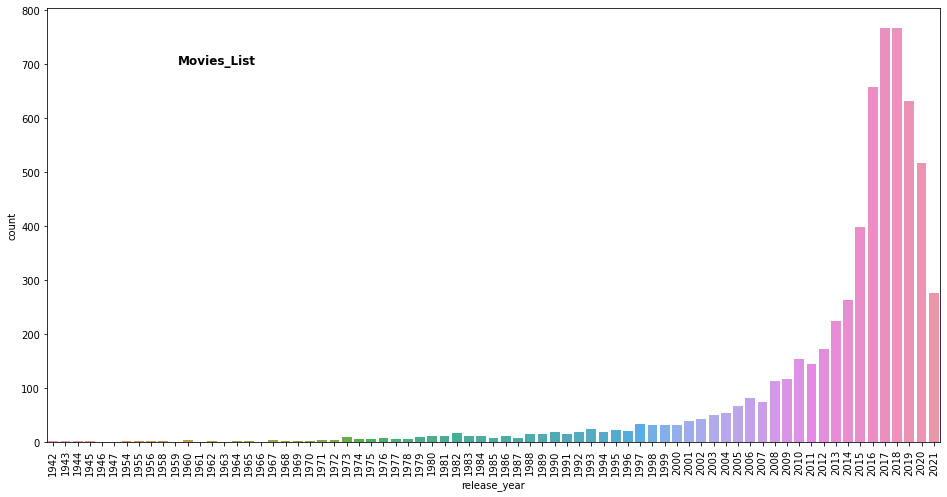

In [16]:
plt.figure(figsize=(16,8))
release_year = sns.countplot(data=justMoviesdf, x='release_year')
release_year.set_xticklabels(release_year.get_xticklabels(), rotation=90)
plt.text(10+0.2, 700, "Movies_List", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.show()

In [17]:
pd.DataFrame(justTvshowdf['release_year'].value_counts()).head(20)

,release_year
2020,436
2019,397
2018,380
2021,315
2017,265
2016,244
2015,162
2014,88
2012,64
2013,63


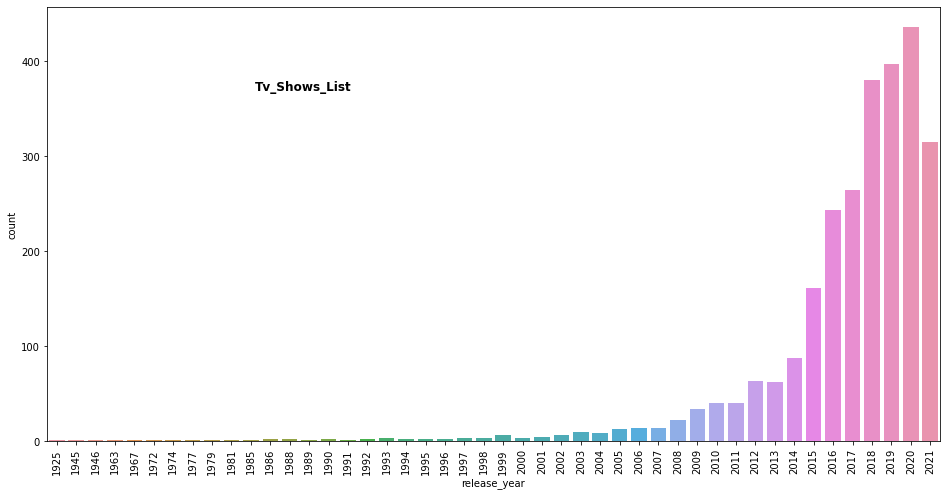

In [18]:
plt.figure(figsize=(16,8))
release_year = sns.countplot(data=justTvshowdf, x='release_year')
release_year.set_xticklabels(release_year.get_xticklabels(), rotation=90)
plt.text(10+0.2, 370, "Tv_Shows_List", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.show()

#### Content form which year ?
Movies released in 2017, 2018, 2016, 2019 and 2020 are top5 contributors to content

Tv-Shows released in 2020, 2019, 2018, 2021 and 2017 are top5 contributors to content

### 3. Rating of movies and TV shows being added to Netflix

In [19]:
Movie_rating = pd.DataFrame(justMoviesdf.groupby('rating'
                                                )['show_id'].count()).rename({'show_id' : 'Movie_count'
                                                                       }, axis=1).iloc[3:].sort_values(by='Movie_count'
                                                                                                      ).reset_index()

Movie_rating

,rating,Movie_count
0,NC-17,3
1,UR,3
2,TV-Y7-FV,5
3,G,41
4,NR,75
5,TV-G,126
6,TV-Y,131
7,TV-Y7,139
8,PG,287
9,PG-13,490


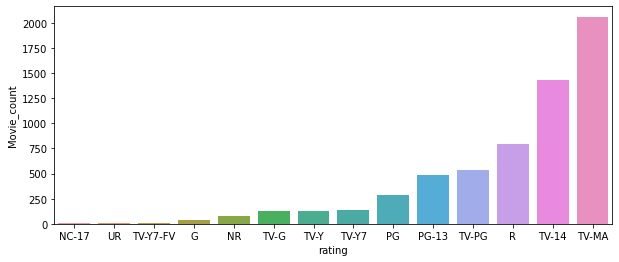

In [20]:
plt.figure(figsize=(10, 4))
m_rating = sns.barplot(data=Movie_rating, x='rating', y = 'Movie_count')
plt.show()

In [21]:
Tvshow_rating = pd.DataFrame(justTvshowdf.groupby('rating')['show_id'].count()
                            ).rename({'show_id' : 'Tv_show_count'}, axis=1
                                    ).sort_values(by='Tv_show_count').reset_index()

Tvshow_rating

,rating,Tv_show_count
0,TV-Y7-FV,1
1,R,2
2,NR,5
3,TV-G,94
4,TV-Y,176
5,TV-Y7,195
6,TV-PG,323
7,TV-14,733
8,TV-MA,1145


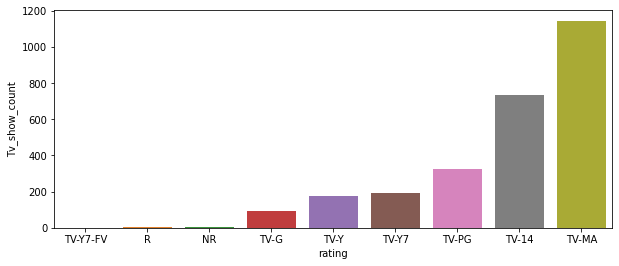

In [22]:
plt.figure(figsize=(10, 4))
Tvs_rating = sns.barplot(data=Tvshow_rating, x='rating', y = 'Tv_show_count')
plt.show()

#### Observations 

Among Movies TV-MA, TV-14, R, TV-PG, PG-13 are the top 5 rating movies in Netflix

Among TV shows TV-MA, TV-14, TV-PG, TV-Y7, TV-Y are the top 5 rating Tv shows in Netflix

### 4. How many movies and TV shows come from each country

In [23]:
constraint = justMoviesdf['country'].apply(lambda x : str(x).split(', ')).tolist()

mcountrydf = pd.DataFrame(constraint,index=justMoviesdf['title'])
mcountrydf = mcountrydf.stack() 
mcountrydf = pd.DataFrame(mcountrydf).dropna()
mcountrydf.rename({0:'country'}, axis=1, inplace=True)

mcountrydf

country
title                                            
Dick Johnson Is Dead             0  United States
My Little Pony: A New Generation 0            nan
Sankofa                          0  United States
                                 1          Ghana
                                 2   Burkina Faso
...                                           ...
Zinzana                          1         Jordan
Zodiac                           0  United States
Zombieland                       0  United States
Zoom                             0  United States
Zubaan                           0          India

[7814 rows x 1 columns]

In [24]:
mcount = mcountrydf.value_counts()
mcount = pd.DataFrame(mcount).rename({0:'count'}, axis=1)
mcount.drop(index='nan', inplace=True)
mcount.head(30)

C:\Users\acer\AppData\Local\Temp\ipykernel_5336\3300778265.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  mcount.drop(index='nan', inplace=True)


,count
country,
United States,2751
India,962
United Kingdom,532
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114


In [25]:
mcount.reset_index()

,country,count
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
...,...,...
117,Nicaragua,1
118,Palestine,1
119,Panama,1
120,Paraguay,1


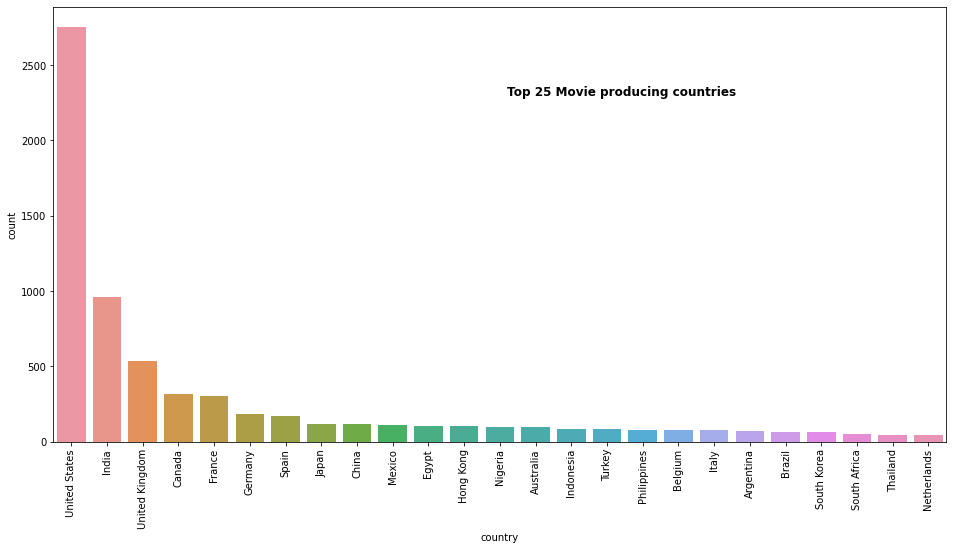

In [26]:
plt.figure(figsize=(16,8))
country = sns.barplot(data=mcount.reset_index().head(25), x='country', y='count')
country.set_xticklabels(country.get_xticklabels(), rotation=90)
plt.text(12+0.2, 2300, "Top 25 Movie producing countries", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.show()

#### Observation

From above data we can observe that movies shot in 127 different countries and top 5 most movie producing nations are
United States, India, United Kingdom, Canada and France

In [27]:
constraint = justTvshowdf['country'].apply(lambda x : str(x).split(', ')).tolist()

tvcountrydf = pd.DataFrame(constraint,index=justTvshowdf['title'])
tvcountrydf = tvcountrydf.stack() 
tvcountrydf = pd.DataFrame(tvcountrydf).dropna()
tvcountrydf.rename({0:'country'}, axis=1)

tvcountrydf

0
title                                
Blood & Water         0  South Africa
Ganglands             0           nan
Jailbirds New Orleans 0           nan
Kota Factory          0         India
Midnight Mass         0           nan
...                               ...
Zak Storm             1        France
                      2   South Korea
                      3     Indonesia
Zindagi Gulzar Hai    0      Pakistan
Zombie Dumb           0           nan

[3031 rows x 1 columns]

In [28]:
tvcount = tvcountrydf.value_counts()
tvcount = pd.DataFrame(tvcount).rename({0:'count'}, axis=1)
tvcount.drop(index='nan', inplace=True)
tvcount.head(30)

C:\Users\acer\AppData\Local\Temp\ipykernel_5336\1764814466.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  tvcount.drop(index='nan', inplace=True)


,count
0,
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66


In [29]:
tvcount = tvcount.reset_index().rename({0:'country'}, axis=1)

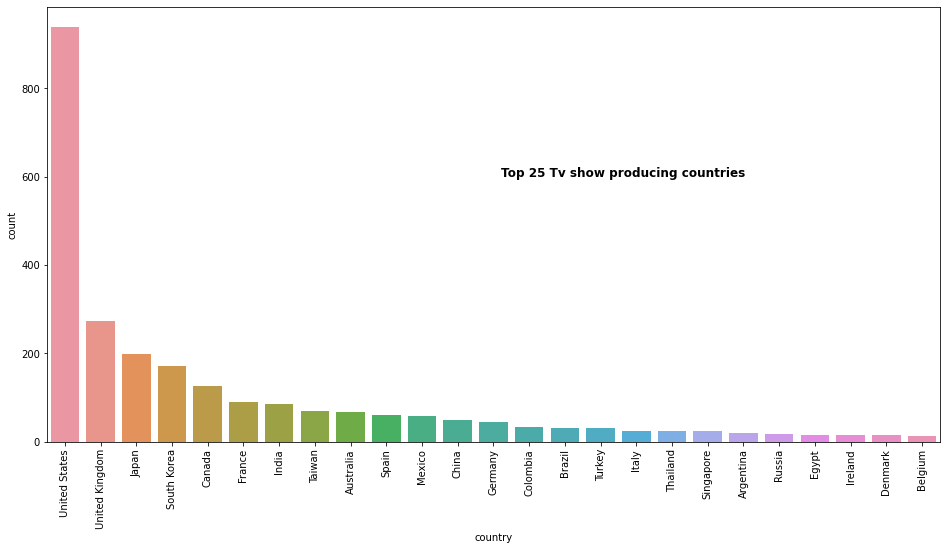

In [30]:
plt.figure(figsize=(16,8))
country = sns.barplot(data=tvcount.head(25), x='country', y='count')
country.set_xticklabels(country.get_xticklabels(), rotation=90)
plt.text(12+0.2, 600, "Top 25 Tv show producing countries", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.show()

#### Observation

From above data we can observe that TV shows shot in 66 different countries and top 5 most Tv show producing nations are
United States, United Kingdom, Japan, South Korea and Canada

### 5. Listed_in, Director and actor based categorization

### we will be splitting which is comma separated

Actordf   ->  Actor segregation based on movies

diretordf ->  diretor segregation based on movies

catdf     ->  category segregation based on movies

In [31]:
constraint = df['cast'].apply(lambda x : str(x).split(', ')).tolist()

Actordf =pd.DataFrame(constraint,index=df['title'])
Actordf=Actordf.stack() 

Actordf=pd.DataFrame(Actordf).dropna()
Actordf.rename({0:'Actor'}, axis=1, inplace=True)
Actordf

Actor
title                                        
Dick Johnson Is Dead 0                    nan
Blood & Water        0             Ama Qamata
                     1            Khosi Ngema
                     2          Gail Mabalane
                     3         Thabang Molaba
...                                       ...
Zubaan               3       Manish Chaudhary
                     4           Meghna Malik
                     5          Malkeet Rauni
                     6         Anita Shabdish
                     7  Chittaranjan Tripathy

[64951 rows x 1 columns]

In [32]:
Actorcount = pd.DataFrame(Actordf.value_counts())
Actorcount = Actorcount.rename({0:'Appearence_Count'}, axis=1).reset_index().iloc[1:]
Actorcount.head(20)

,Actor,Appearence_Count
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29
10,Amitabh Bachchan,28


In [33]:
Actorcount.Actor.unique().size

36439

#### Observations

List of actors with appearence across movies and TV shows are listed in decending order. Top 10 are listed below
There are 36439 unique actors in current dataset


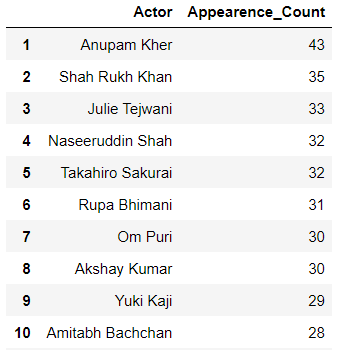

In [34]:
constraint = df['director'].apply(lambda x : str(x).split(', ')).tolist()

diretordf =pd.DataFrame(constraint,index=df['title'])
diretordf=diretordf.stack() 

diretordf=pd.DataFrame(diretordf)
diretordf.rename({0:'Director'}, axis=1, inplace=True)
diretordf

,,Director
title,,
Dick Johnson Is Dead,0,Kirsten Johnson
Blood & Water,0,nan
Ganglands,0,Julien Leclercq
Jailbirds New Orleans,0,nan
Kota Factory,0,nan
...,...,...
Zodiac,0,David Fincher
Zombie Dumb,0,nan
Zombieland,0,Ruben Fleischer


In [35]:
directorcount = pd.DataFrame(diretordf.value_counts())
directorcount = directorcount.rename({0:'DIrection_Count'}, axis=1).reset_index().iloc[1:]
directorcount.head(20)

,Director,DIrection_Count
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Youssef Chahine,12
10,Jay Chapman,12


In [36]:
directorcount.Director.unique().size

4993

#### Observations

List of Directors with highest TV show and Movies listed in decending order. Top 10 are listed below
There are 4993 unique Director in current dataset


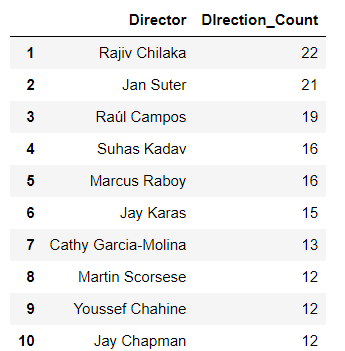

In [37]:
constraint = df['listed_in'].apply(lambda x : str(x).split(', ')).tolist()

catdf =pd.DataFrame(constraint,index=df['title'])
catdf=catdf.stack() 

catdf=pd.DataFrame(catdf)
catdf.rename({0:'category'}, axis=1, inplace=True)

catdf

category
title                                           
Dick Johnson Is Dead 0             Documentaries
Blood & Water        0    International TV Shows
                     1                 TV Dramas
                     2              TV Mysteries
Ganglands            0            Crime TV Shows
...                                          ...
Zoom                 0  Children & Family Movies
                     1                  Comedies
Zubaan               0                    Dramas
                     1      International Movies
                     2          Music & Musicals

[19323 rows x 1 columns]

In [38]:
catcount = pd.DataFrame(catdf.value_counts())
catcount = catcount.rename({0:'Category_count'}, axis=1).reset_index().iloc[:]
catcount

,category,Category_count
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


#### Observations

List of content categories listed in decending order. Top 10 are listed below
There are 41 unique categories in current dataset. Top 10 are listed below


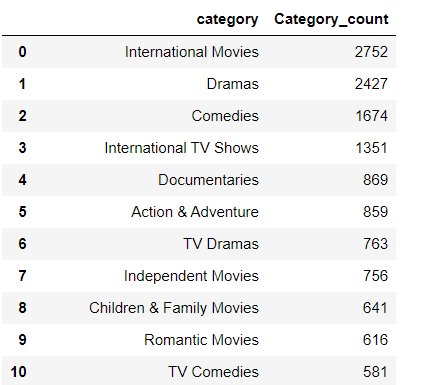

#### Merging all the Dataframes

In [39]:
moviedf = pd.merge(Actordf, diretordf, on="title", how='inner').merge(catdf, on="title", how='inner')
moviedf.rename(columns={'0_x' : 'Actor', '0_y' : 'Director', 0 : 'category'}, inplace=True)
moviedf

,Actor,Director,category
title,,,
Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries
Blood & Water,Ama Qamata,nan,International TV Shows
Blood & Water,Ama Qamata,nan,TV Dramas
Blood & Water,Ama Qamata,nan,TV Mysteries
Blood & Water,Khosi Ngema,nan,International TV Shows
...,...,...,...
Zubaan,Anita Shabdish,Mozez Singh,International Movies
Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals
Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas


In [40]:
moviedf.Actor.value_counts()
moviedf.isna().sum()

Actor       0
Director    0
category    0
dtype: int64

In [41]:
moviedf = moviedf.replace("nan", np.nan)
moviedf.dropna(how='all')

,Actor,Director,category
title,,,
Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries
Blood & Water,Ama Qamata,NaN,International TV Shows
Blood & Water,Ama Qamata,NaN,TV Dramas
Blood & Water,Ama Qamata,NaN,TV Mysteries
Blood & Water,Khosi Ngema,NaN,International TV Shows
...,...,...,...
Zubaan,Anita Shabdish,Mozez Singh,International Movies
Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals
Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas


 ### 6. Best time to add Movie and TV show to Netflix
 
 Assumption :- we will be making search based on month where we saw highest number of movies and Tv shows added assuming they are successful.

In [42]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
 13  month_added   8797 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory usage: 963.4+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,November
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,July
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,November
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,January


In [43]:
movie_Time = df[df['type'] == 'Movie']['month_added']
movie_Time = pd.DataFrame(movie_Time.value_counts())
movie_Time = movie_Time.reset_index().rename({'index' : 'month', 'month_added' : 'count'}, axis=1)
movie_Time

,month,count
0,July,565
1,April,550
2,December,547
3,January,546
4,October,545
5,March,529
6,September,519
7,August,519
8,November,498
9,June,492


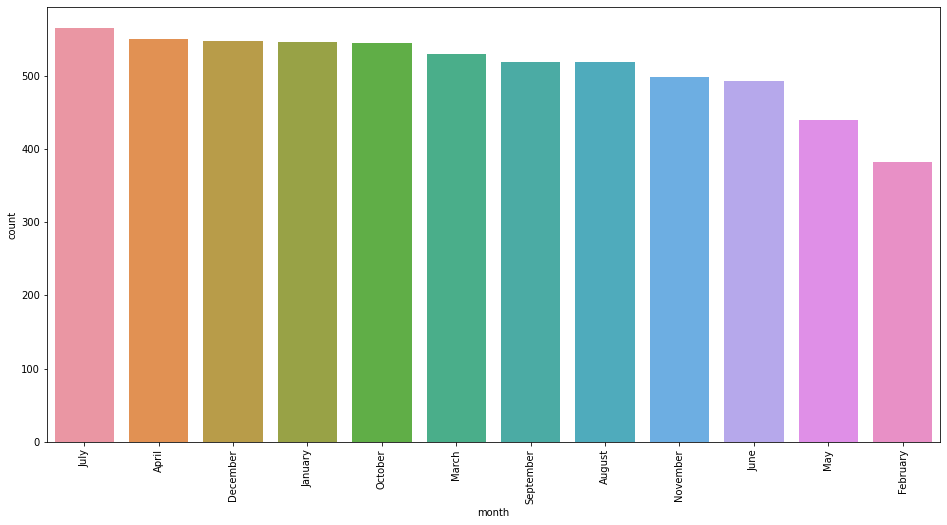

In [44]:
plt.figure(figsize=(16,8))
movie_Time_g = sns.barplot(data=movie_Time, x = 'month', y= 'count')
movie_Time_g.set_xticklabels(movie_Time_g.get_xticklabels(), rotation=90)
plt.show()

In [45]:
Tv_Time = df[df['type'] != 'Movie']['month_added']
Tv_Time = pd.DataFrame(Tv_Time.value_counts())
Tv_Time = Tv_Time.reset_index().rename({'index' : 'month', 'month_added' : 'count'}, axis=1)
Tv_Time

,month,count
0,December,266
1,July,262
2,September,251
3,August,236
4,June,236
5,October,215
6,April,214
7,March,213
8,November,207
9,May,193


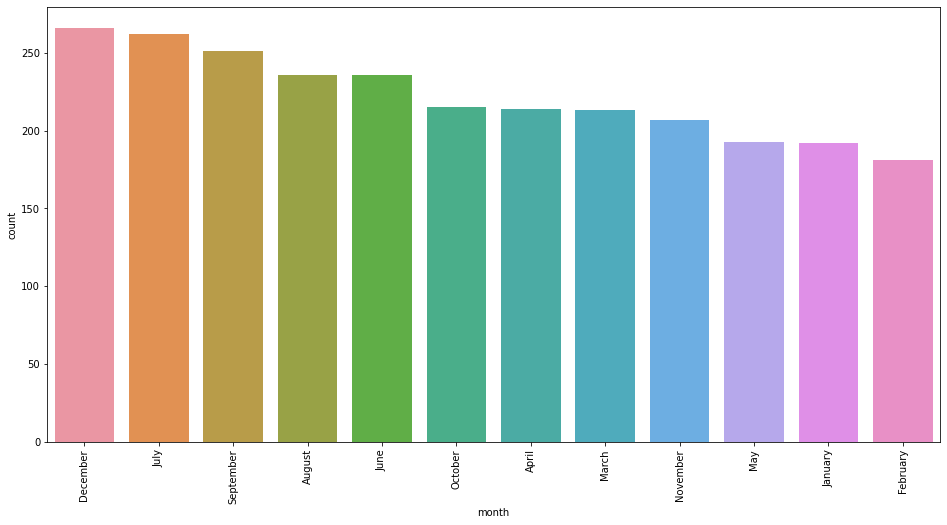

In [46]:
plt.figure(figsize=(16,8))
Tv_Time_g = sns.barplot(data=Tv_Time, x = 'month', y= 'count')
Tv_Time_g.set_xticklabels(Tv_Time_g.get_xticklabels(), rotation=90)
plt.show()

### Observations

Movies from the graph we can observe that netflix has released most of the movies throughout the year evenly but in July, April and December we can clearly see that frequency of releases increase so That looks like best time

TV-shows from the graph we can observe that netflix has released most of the Tv shows throughout the year evenly but in December, July and September we can clearly see that frequency of releases increase so That looks like best time

Jupyter Notebook Pdf Link : https://drive.google.com/file/d/15uM_szyfqyGQoD-H0Iq7aJOYBM8XYD0u/view?usp=sharing

Current analysis on Netflix Data is focusing on

Categorize based on Movies and TV shows
How many movies and TV shows released each year
Ratings based categorization
How many movies and TV shows come from each country
Listed in, Director and actor based categorization
Best Time to release movie and Tv show
Assumptions

Since we don't have data on user reviews we can't do popular movie, director, actors based recommendation. So we will be considering all movies are front-runners and based on count of actors, directors across different movies recommendations will be made

Insights :
From Data we are seeing number of movies is around 70% of the content and Tv shows take up only 30% 
93% of the content added to Netflix are released in last 20 years
Movies released in 2017, 2018, 2016, 2019 and 2020 are top5 contributors to content and Tv-Shows released in 2020, 2019, 2018, 2021 and 2017 are top5 contributors to content

Among Movies TV-MA, TV-14, R, TV-PG, PG-13 are the top 5 rating movies in Netflix and Among TV shows TV-MA, TV-14, TV-PG, TV-Y7, TV-Y are the top 5 rating Tv shows in Netflix                                                                 

Movies produced in 127 different countries and top 5 most movie producing nations are United States, India, United Kingdom, Canada and France              

TV shows  are produced in 66 different countries and top 5 most TV shows producing nations are United States, United Kingdom, Japan, South Korea and Canada

There are 36439 unique actors in current dataset.  Top 10 actors are listed below

                                                                   image.png
There are 4993 unique Director in current dataset. Top 10 directors are listed below
                                                                     image-2.png
There are 41 unique categories in current dataset. Top 10 are listed below   image.png

Recommendations :
Since we are seeing number of Movies acquired by Netflix over the years is higher so users are linking and watching lot more movies than Tv series so increasing movie collection will positively impact Netflix viewership
Latest contest are huge in number so adding more of recent contents will be useful, since users are watching mostly recent contents
TV-MA, TV-14, R these are the most common rated content in both movies and Tv shows so they are liked by users , for future movie acquisitions Netflix should have to look in these categories
Acquire more contents of top 10 to 20 Actors , Director's and category since users are focusing on these more and liking it
Netflix has released most of the movies throughout the year evenly but in July, April and December we can clearly see that frequency of releases increase so That looks like best time for movies to add. For TV-shows December, July and September looks like best time
